In [1]:
import pandas as pd

In [62]:
df = pd.read_csv('eda_df_last')
df.shape

(50000, 31)

In [64]:
df = df[['First_pokemon', 'Second_pokemon', 'Winner','Type 1_x', 'Type 2_x','Type 1_y', 'Type 2_y']]

In [65]:
df.head()

,First_pokemon,Second_pokemon,Winner,Type 1_x,Type 2_x,Type 1_y,Type 2_y
0,266,298,298,Rock,Ground,Grass,Dark
1,702,701,701,Grass,Fighting,Rock,Fighting
2,191,668,668,Fairy,Flying,Psychic,NaN
3,237,683,683,Fire,NaN,Dragon,NaN
4,151,231,151,Rock,Water,Bug,Rock


In [68]:
tmp = df[
            ((df['Type 1_x']=='Water')&(df['Type 1_y']=='Fighting')) |
            ((df['Type 1_x']=='Water')&(df['Type 2_y']=='Fighting')) |
            ((df['Type 2_x']=='Water')&(df['Type 1_y']=='Fighting')) |
            ((df['Type 2_x']=='Water')&(df['Type 2_y']=='Fighting')) |
    
            ((df['Type 1_x']=='Fighting')&(df['Type 1_y']=='Water')) |
            ((df['Type 1_x']=='Fighting')&(df['Type 2_y']=='Water')) |
            ((df['Type 2_x']=='Fighting')&(df['Type 1_y']=='Water')) |
            ((df['Type 2_x']=='Fighting')&(df['Type 2_y']=='Water')) 
        ]

In [98]:
total = tmp.shape[0]
total

1054

In [ ]:
# Water의 승리 횟수

In [100]:
#첫번째 포켓몬이 이긴 경우
first_win = tmp[(tmp.Winner==tmp.First_pokemon)]
first_win.head()

,First_pokemon,Second_pokemon,Winner,Type 1_x,Type 2_x,Type 1_y,Type 2_y
58,141,721,141,Water,Flying,Grass,Fighting
124,600,598,600,Fighting,NaN,Water,Ground
148,153,559,153,Rock,Water,Fire,Fighting
155,278,94,278,Fire,Fighting,Water,NaN
211,438,242,438,Fire,Fighting,Water,NaN


In [102]:
water_win_1 = ((first_win['Type 1_x'] == 'Water')|(first_win['Type 2_x']=='Water')).sum()
water_win_1

228

In [ ]:
#두번째 포켓몬이 이긴경우 Water의 승리횟수

In [103]:
second_win = tmp[(tmp.Winner==tmp.Second_pokemon)]

In [105]:
water_win_2 = ((second_win['Type 1_y'] == 'Water')|(second_win['Type 2_y']=='Water')).sum()
water_win_2

In [107]:
water_win = water_win_1 + water_win_2
fighting_win = total - water_win

In [108]:
water_win, fighting_win

(454, 600)

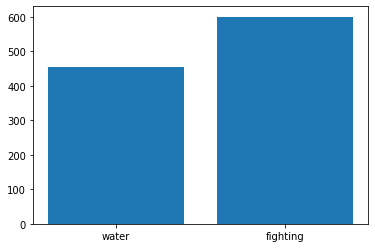

In [110]:
import matplotlib.pyplot as plt
plt.bar(['water','fighting'], [water_win, fighting_win])
plt.show()